# Import the Libraries and Dataset

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

iris = datasets.load_iris()

X = iris.data
# Iris.data contains the features or independent variables.
y = iris.target
# Iris.target contains the labels or the dependent variables.

# Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30,random_state=50)

# random_state=55

# Pre-Processing and Standardization

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
scaler = StandardScaler()
# scaler = MinMaxScaler()
# scaler = Normalizer()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# K-Nearest Neighbours Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=20)
classifier.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=20)

# Predictions & Evaluations

In [14]:
#Predictions & Evaluations
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print ('Accuracy of the classifier is', accuracy_score(y_test, y_pred)*100, '%')

Accuracy of the classifier is 95.55555555555556 %


# Detection of Optimal Value for K Neighnours

In [15]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


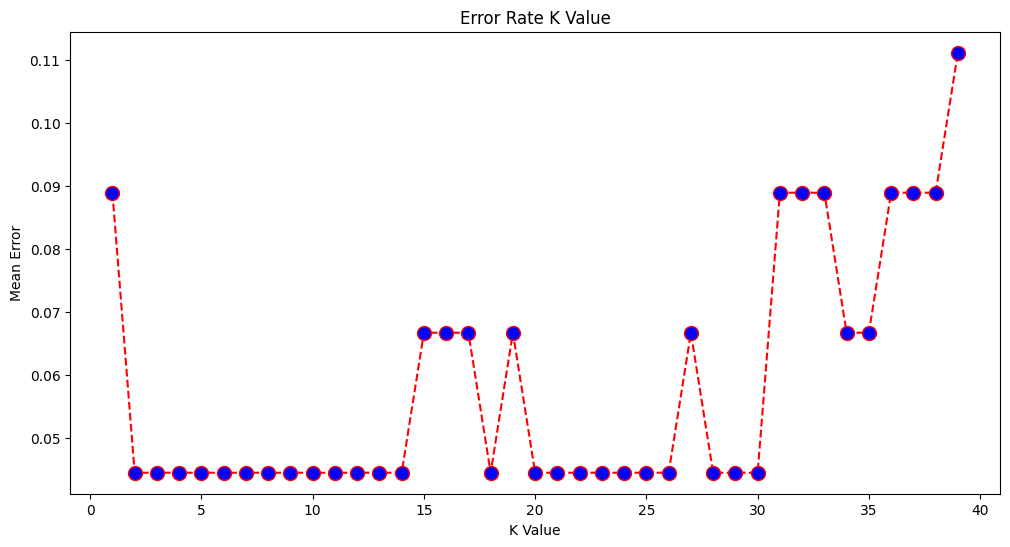

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()
